In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Linear regression with one variable.

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

The file ex1data1.txt contains the dataset for our linear regression prob- lem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

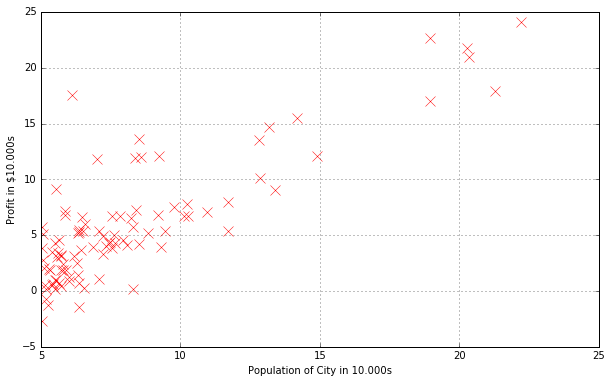

In [2]:
data_ex1 = 'ex1/ex1data1.txt'
data = np.loadtxt(data_ex1, delimiter=',', unpack=True)

# Get feature data and labels
X = np.transpose(np.array(data[:1]))
Y = np.transpose(np.array(data[1:]))

# Plot data
plt.figure(figsize=(10,6))
plt.plot(X[:,0],Y[:,0],'rx',markersize=10)
plt.ylabel("Profit in $10.000s")
plt.xlabel("Population of City in 10.000s")
plt.grid(True)

### Gradient Descent

In [3]:
# Insert columns of 1's into X
X = np.insert(X,0,1,axis=1)
theta = np.zeros((np.shape(X)[1],1)) # Our initial weights

# Number of times to run Gradient Descent
iterations = 1500
# Learning rate of Gradient Descent algorithm
alpha = 0.01
# Number of training samples
m = len(Y)

Calculate J(θ) so you can check the convergence of your gradient descent implementation.
The vectorized formula is J(θ)= 1/2m * (h(x) - y).T * (h(x) - y)

In [4]:
# Used to compute Y value
def hypothesis(X, weights):
    return np.dot(X, weights)

# Used to compute cost (error) of regression
def calculate_cost(X, Y, weights):
    # Compute cost with vectorized cost function.
    cost = np.dot((hypothesis(X, weights) - Y).T,(hypothesis(X, weights) - Y)) * 1/(2 * m)
    # Return the cost as a scalar value.
    return np.sum(cost) 

print calculate_cost(X,Y, theta)

32.0727338775


Gradient descent routine:

In [5]:
def gradient_descent(X, Y, weights=np.zeros((2,1))):
    # Keep history of costs to visualize how 
    # value of cost function decreases to a minimum
    costs = []
    # Keep history of weights to visualize 2D plot of 
    # weights finding their values for minimum cost function.
    weight_history = []
    start_weights = weights
    for iteration in range(iterations):
        weights_temp = weights
        costs.append(calculate_cost(X, Y, weights_temp))
        weight_history.append(list(weights[:,0]))
        for j in range(len(theta)):
                     error = hypothesis(X, start_weights) - Y
                     weights_temp[j] = weights[j] - (alpha/m) * np.sum(error * np.array(X[:,j]).reshape((m,1)))
        # Update all weights at the same time
        weights = weights_temp
                     
    return costs, weights, weight_history

Apply gradient routine to first exercise and plot convergence of cost function.

Final weights are [[-3.63606348]
 [ 1.16698916]]


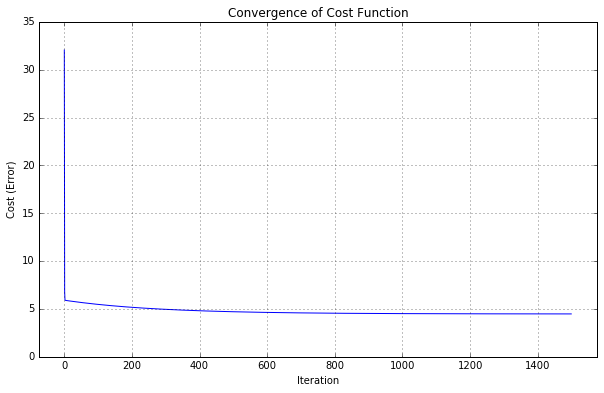

In [6]:
# Compute weights (theta) for first exercise
initial_weights = np.zeros((X.shape[1],1)) # Our number of features (m) x 1
costs, weights, weight_history = gradient_descent(X, Y, initial_weights)

#Plot the convergence of the cost function
def plotCostFunction(cost_values):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(cost_values)), cost_values, 'b-')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration")
    plt.ylabel("Cost (Error)")
    plt.xlim([-0.05*iterations,1.05*iterations])

plotCostFunction(costs)    
print "Final weights are {}".format(weights)

Plot final linear regression function on top of data:

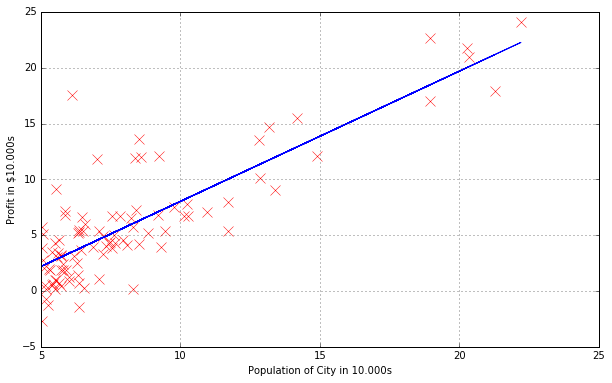

In [7]:
reg = weights[0] + weights[1] * X[:,1]

plt.figure(figsize=(10,6))
plt.plot(X[:,1],Y[:,0],'rx',markersize=10)
plt.plot(X[:,1], reg,"b-")
plt.ylabel("Profit in $10.000s")
plt.xlabel("Population of City in 10.000s")
plt.grid(True)

Plot of the cost over a 2-dimensional grid of θ0 and θ1 values:

In [64]:
# TO-DO plot 2D representation of cost function



### Linear regression with multiple variables

In [9]:
data_ex2 = 'ex1/ex1data2.txt'
data2 = np.loadtxt(data_ex2,delimiter=',',usecols=(0,1,2),unpack=True)

# Get feature data and labels
X2 = np.transpose(np.array(data2[:-1]))
Y2 = np.transpose(np.array(data2[-1:]))
m = len(Y2)

##### Feature normalization
Because house sizes are on a different scale (1000 times larger) from number of bedrooms we will normalize our features.

In [10]:
X2_normalized = X2.copy()

# Store mean and standard deviation to use when normalizing a new value
means, stds = [], []

# Iterate over features and normalize
for col in range(np.shape(X2)[1]):
    # Compute mean and standard deviation for feature
    mean, std = np.mean(X2[:,col]), np.std(X2[:,col])
    # Instead of std, range (max-min) can also be used.
    X2_normalized[:,col] = (X2_normalized[:,col] - mean) / std
    # Save mean, std
    means.append(mean)
    stds.append(std)

##### Gradient descent for multivariate linear regression

In [11]:
# Add column of 1's to normalized X
X2_normalized = np.insert(X2_normalized,0,1,axis=1)

initial_weights2 = np.zeros((3,1))
costs_multi, weights, weight_history = gradient_descent(X2_normalized, Y2, initial_weights2)

Plotting cost function minimization:

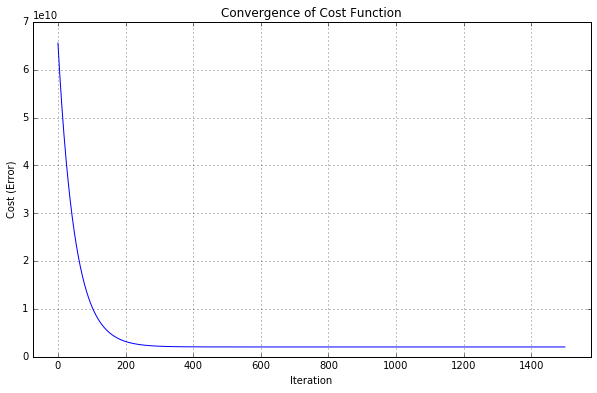

In [12]:
plotCostFunction(costs_multi)